In [87]:
from bayes_opt import BayesianOptimization
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec 
%matplotlib inline 
# make matplotlib graphs show in line

# Target Function 

Let's create a target 1-D function with multiple local maxima to test and visualize how the BayesianOptimization package works. The target function we will try to maximize is the following:

$$f(x) = e^{-(x - 2)^2} + e^{-\frac{(x - 6)^2}{10}} + \frac{1}{x^2 + 1}, $$ with maximum at $x = 2$. We will restrict the interval of interest to $x \in (-2,10)$.

In practice this function will be unknown, but we have the ability to sample from it. By balancing exploration and exploitation, Bayesian Optimization can help to choose the series of points at which to sample. 

In [88]:
def target(x):
    return np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1)

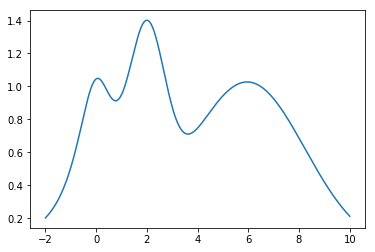

In [89]:
x = np.linspace(-2,10,10000).reshape(-1,1)
y = target(x)

plt.plot(x, y)

So, the above is the function we're trying to learn. Now we move on to...

# Create a BayesianOptimization Object 

This takes the function (doesn't have to be analytic, for my purposes I'll probably just have a separate function in Matlab to do the data analysis, and have a function here that prompts for a value) to be maximized, its variables and their ranges, and a minimum of 2 initial guesses to kick start the algorithms. 

In [90]:
bo = BayesianOptimization(target, {'x': (-2, 10)})

We also need a utility function, which calculates where next to guess given the data so far. We will use the UCB - I have made some notes on this after the meeting with Matsubara-san, it stands for 'Upper Confidence Bound'.

This function has the free parameter $\kappa$ which balances exploitation and exploration. We will use $\kappa=5$, which the authors say is 'bold', i.e. high exploration? 

In [91]:
bo.maximize(init_points=2, n_iter=0, acq='ucb', kappa=5)

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    0.95823 |    5.0931 | 
    2 | 00m00s |    1.39184 |    1.8926 | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


Above we've specified init_points=2 which tells the function to generate 2 random x values and query them for the function values. Instead, I think the bo can be initialized (there is a function for this) with two known values. Then, the maximize function can be run with init_points=2. n_iter is 0 above, because we only want to initialize it, but when running should have n_iter=1. 

Next we define a couple functions to make plotting easier. 

In [92]:
def posterior(bo, x, xmin=-2, xmax=10):
    xmin, xmax = -2, 10
    bo.gp.fit(bo.X, bo.Y)
    mu, sigma = bo.gp.predict(x, return_std=True)
    return mu, sigma

def plot_gp(bo, x, y):
    
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Gaussian Process and Utility Function After {} Steps'.format(len(bo.X)), fontdict={'size':30})
    
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    axis = plt.subplot(gs[0])
    acq = plt.subplot(gs[1])
    
    mu, sigma = posterior(bo, x)
    axis.plot(x, y, linewidth=3, label='Target')
    axis.plot(bo.X.flatten(), bo.Y, 'D', markersize=8, label=u'Observations', color='r')
    axis.plot(x, mu, '--', color='k', label='Prediction')

    axis.fill(np.concatenate([x, x[::-1]]), 
              np.concatenate([mu - 1.9600 * sigma, (mu + 1.9600 * sigma)[::-1]]),
        alpha=.6, fc='c', ec='None', label='95% confidence interval')
    
    axis.set_xlim((-2, 10))
    axis.set_ylim((None, None))
    axis.set_ylabel('f(x)', fontdict={'size':20})
    axis.set_xlabel('x', fontdict={'size':20})
    
    utility = bo.util.utility(x, bo.gp, 0)
    acq.plot(x, utility, label='Utility Function', color='purple')
    acq.plot(x[np.argmax(utility)], np.max(utility), '*', markersize=15, 
             label=u'Next Best Guess', markerfacecolor='gold', markeredgecolor='k', markeredgewidth=1)
    acq.set_xlim((-2, 10))
    acq.set_ylim((0, np.max(utility) + 0.5))
    acq.set_ylabel('Utility', fontdict={'size':20})
    acq.set_xlabel('x', fontdict={'size':20})
    
    axis.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)
    acq.legend(loc=2, bbox_to_anchor=(1.01, 1), borderaxespad=0.)

We can plot the posterior against the known (but not known...) curve. For me I think I'll just be plotting the posteriors and the current mean, so I'll probably need to change this function slightly. 

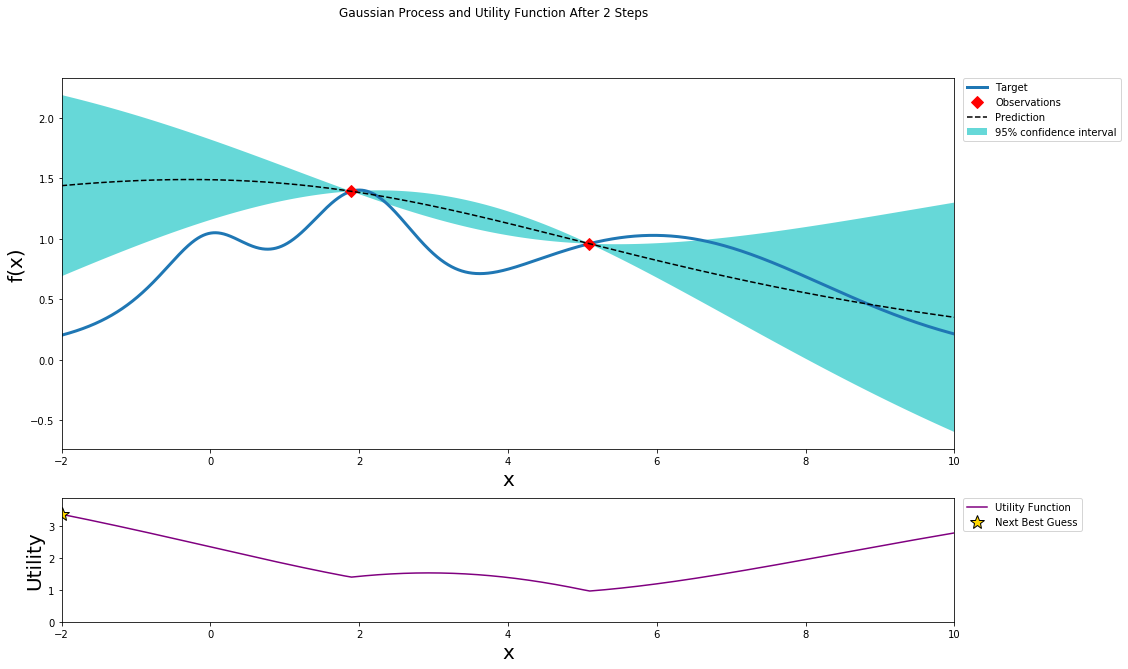

In [93]:
plot_gp(bo, x, y)

Now we do another iteration...

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    3 | 00m01s |    0.20166 |   -2.0000 | 


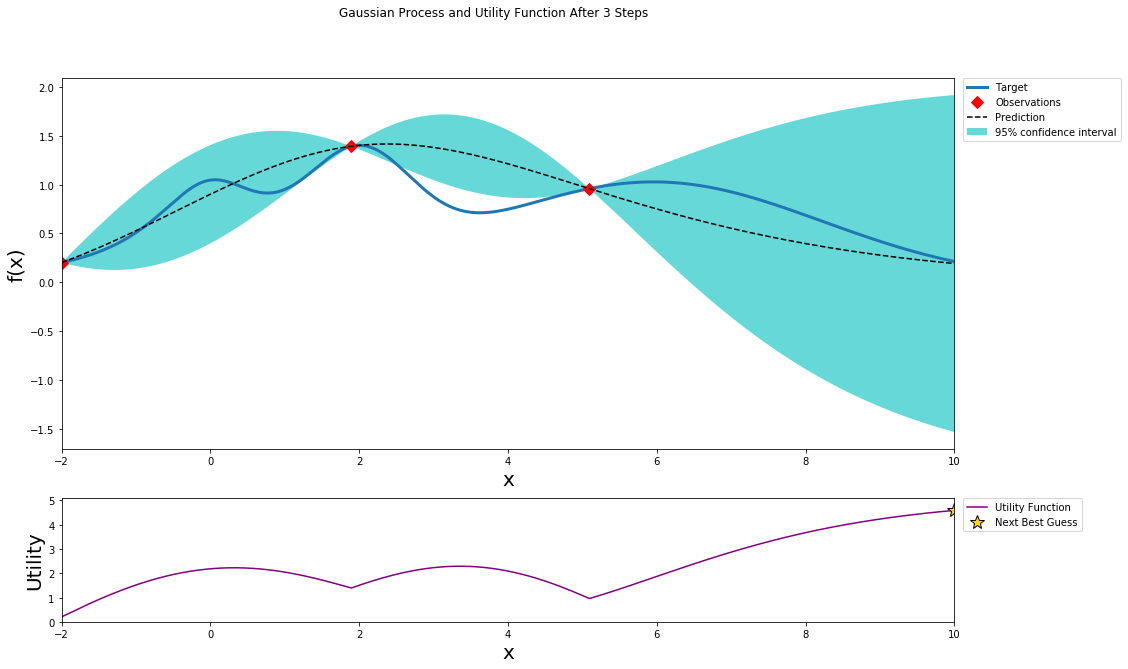

In [94]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    4 | 00m01s |    0.21180 |   10.0000 | 


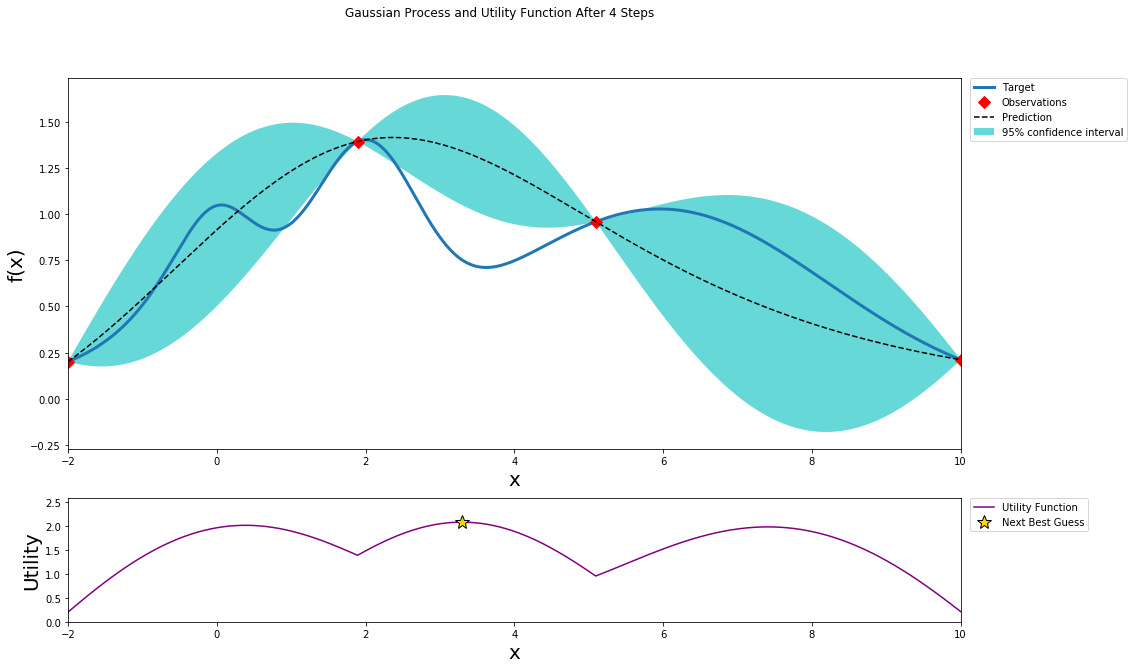

In [95]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    5 | 00m01s |    0.75242 |    3.2948 | 


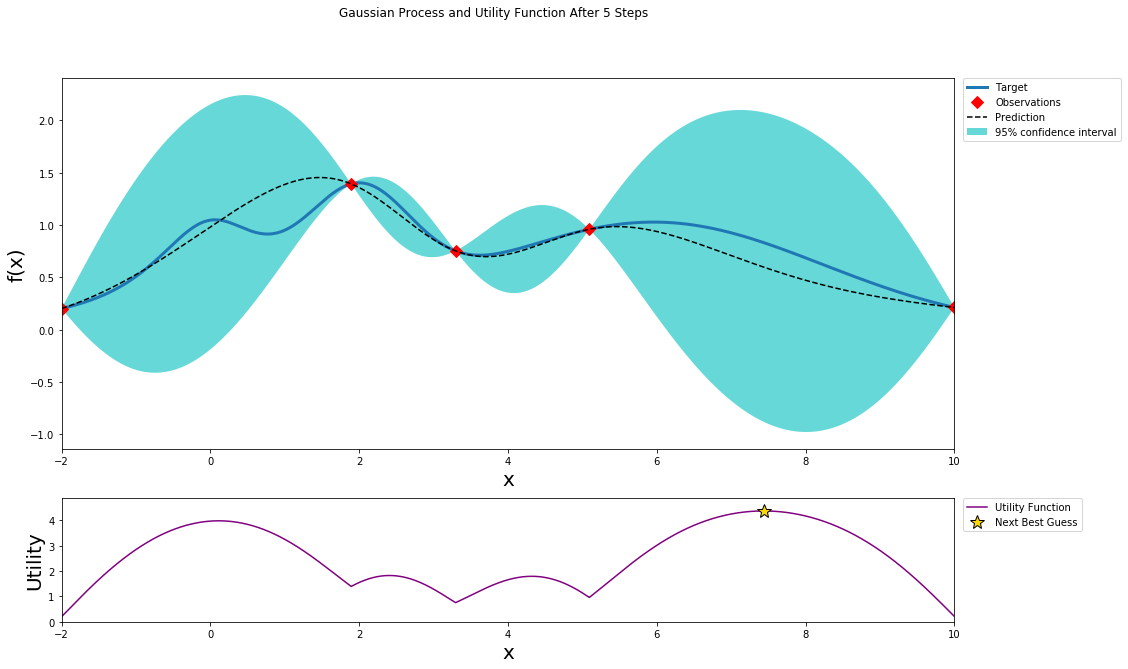

In [96]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    6 | 00m01s |    0.83149 |    7.4357 | 


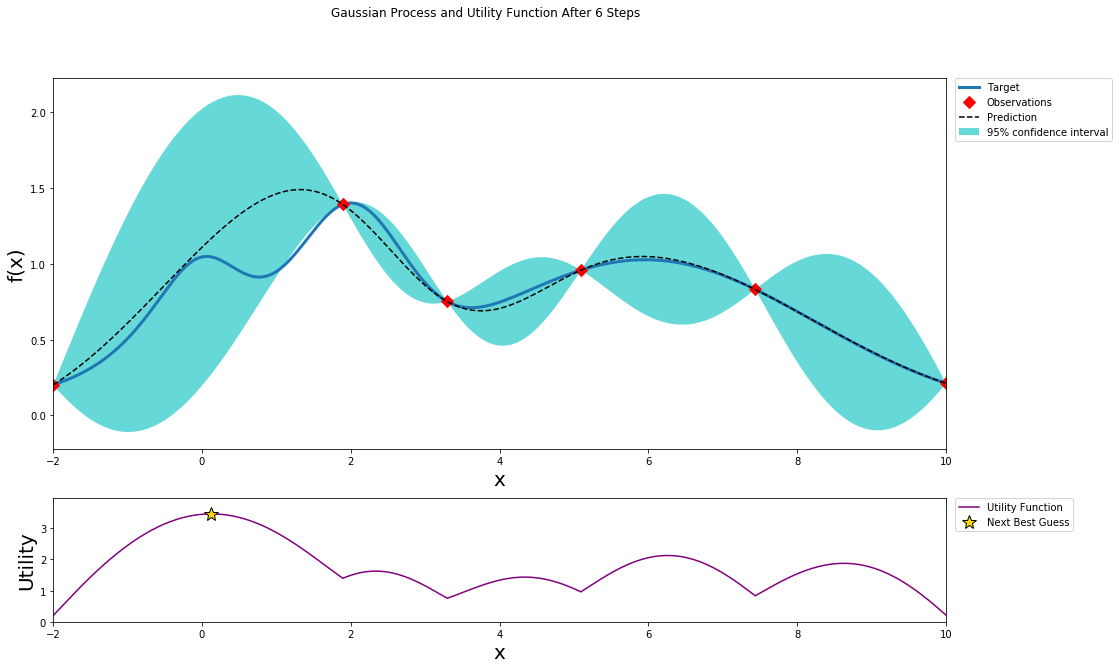

In [97]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    7 | 00m01s |    1.04592 |    0.1263 | 


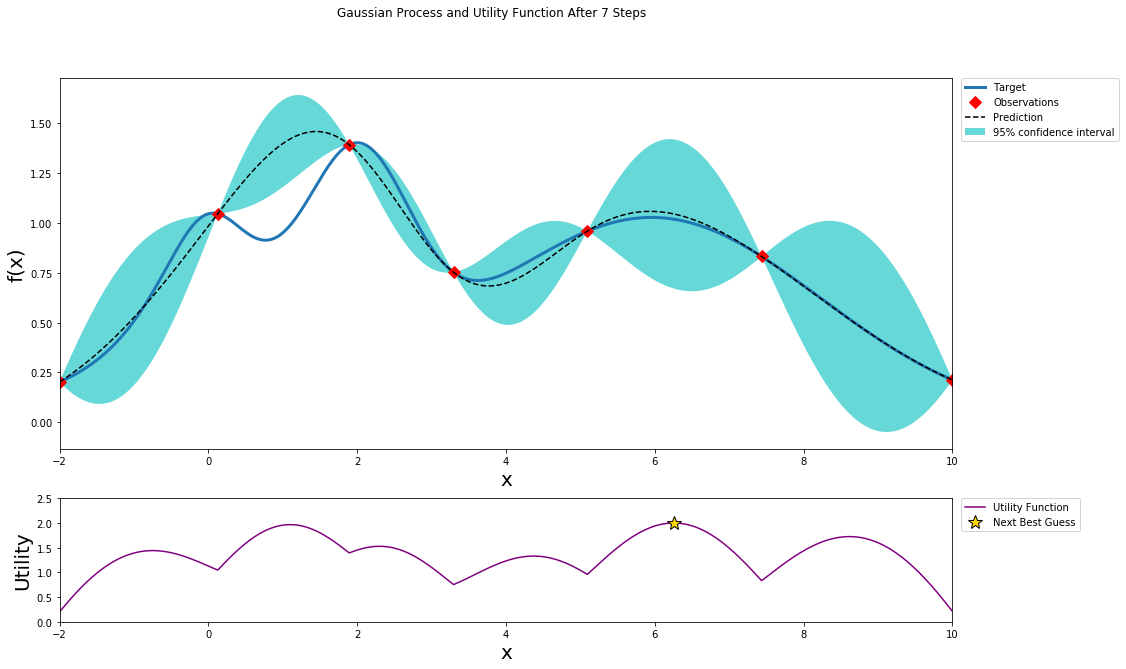

In [98]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    8 | 00m01s |    1.01841 |    6.2555 | 


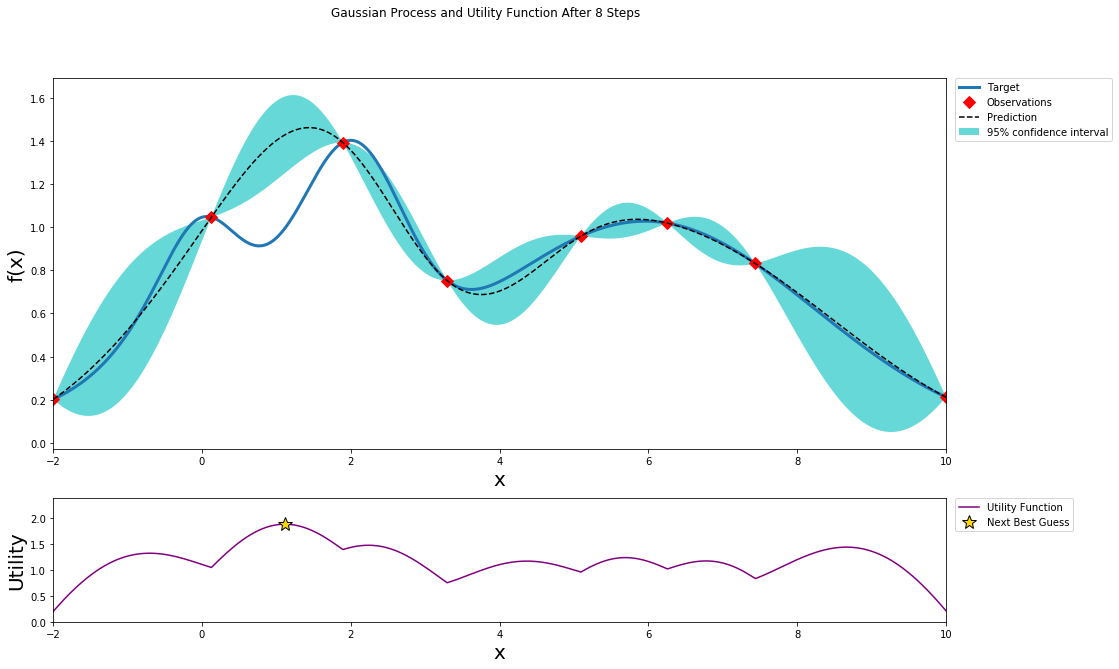

In [99]:
bo.maximize(init_points=0, n_iter=1, kappa=5)
plot_gp(bo, x, y)

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    0.82204 |    4.3793 | 
    2 | 00m00s |    0.74406 |   -0.6078 | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    3 | 00m02s |    0.21180 |   10.0000 | 


    4 | 00m00s |    1.39562 |    1.9155 | 


    5 | 00m00s |    0.87552 |    7.2431 | 


    6 | 00m00s |    0.20166 |   -2.0000 | 


    7 | 00m00s |    0.94161 |    0.9721 | 


    8 | 00m00s |    0.84131 |    3.0632 | 


    9 | 00m00s |    1.02656 |    5.8727 | 


   10 | 00m00s |    0.52454 |    8.5905 | 


   11 | 00m01s |    1.32064 |    2.3137 | 


   12 | 00m01s |    0.97170 |    5.1854 | 


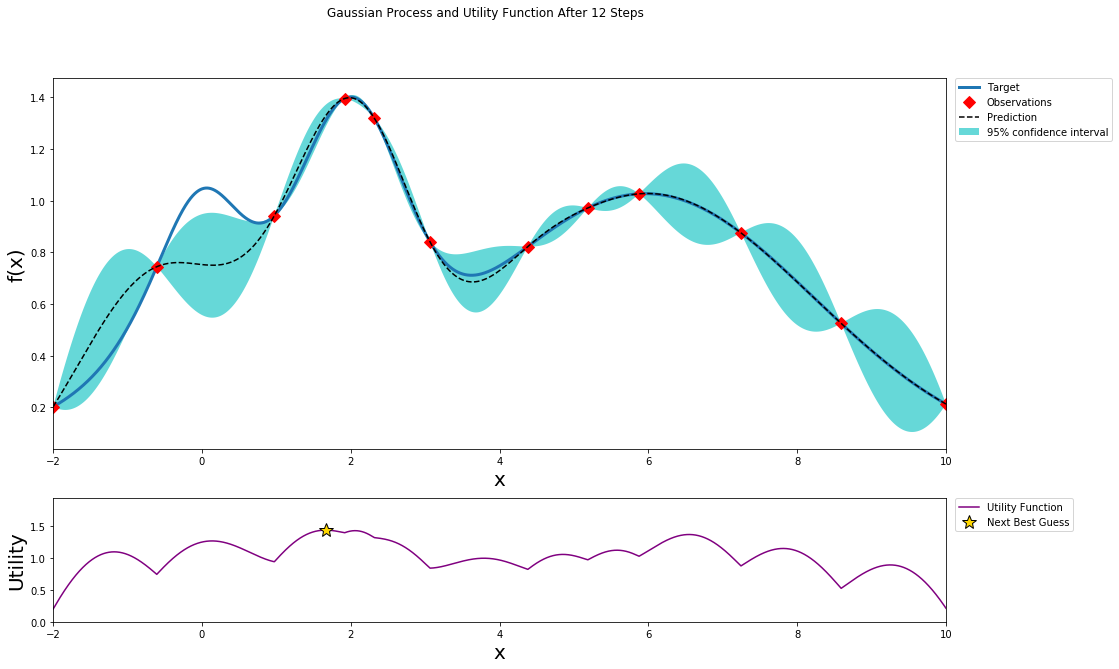

In [100]:
bo = BayesianOptimization(target, {'x': (-2, 10)})
bo.maximize(init_points=2, n_iter=10, kappa=5)
plot_gp(bo, x, y)

I'm going to have to do an extension of the base class to allow for user-input, probably create some sort of keyword. 

Ok, I think I have a good handle on how this works now, how I'm going to implement it with minimal changes to the main code and how to plot it. I'm going to set up the script now - unfortunately a demonstration is taking place so I won't be able to test with actual data until tomorrow. 

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |    1.20619 |    2.5064 | 
    2 | 00m00s |    0.51677 |    8.6195 | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    3 | 00m01s |    0.20166 |   -2.0000 | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    4 | 00m01s |    0.99023 |    5.3309 | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    5 | 00m02s |    0.91723 |    0.8474 | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    6 | 00m02s |    0.71193 |    3.6780 | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    7 | 00m01s |    0.21180 |   10.0000 | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    8 | 00m01s |    0.95095 |    6.8513 | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


    9 | 00m01s |    0.80223 |   -0.5214 | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


   10 | 00m02s |    1.36855 |    1.8017 | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


   11 | 00m02s |    1.02566 |    6.0814 | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


   12 | 00m03s |    1.39765 |    2.0708 | 


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


   13 | 00m05s |    1.40085 |    1.9662 | 


C:\Users\Daniel\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([  1.19705956e-05]), 'nit': 4, 'funcalls': 51}
  " state: %s" % convergence_dict)
C:\Users\Daniel\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -2.68733659e-05]), 'nit': 6, 'funcalls': 59}
  " state: %s" % convergence_dict)


C:\Users\Daniel\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ -1.25684405e-05]), 'nit': 6, 'funcalls': 60}
  " state: %s" % convergence_dict)


Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


C:\Users\Daniel\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:308: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


   14 | 00m07s |    1.40183 |    2.0096 | 


C:\Users\Daniel\Anaconda2\lib\site-packages\sklearn\gaussian_process\gpr.py:427: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'warnflag': 2, 'task': 'ABNORMAL_TERMINATION_IN_LNSRCH', 'grad': array([ 0.00010297]), 'nit': 5, 'funcalls': 50}
  " state: %s" % convergence_dict)


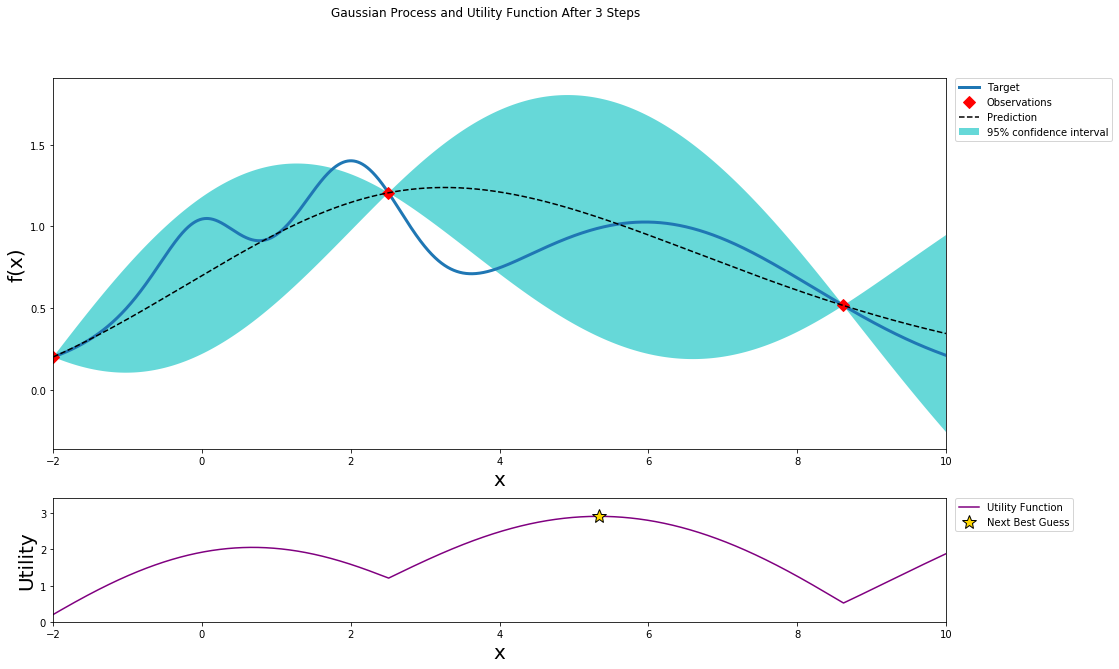

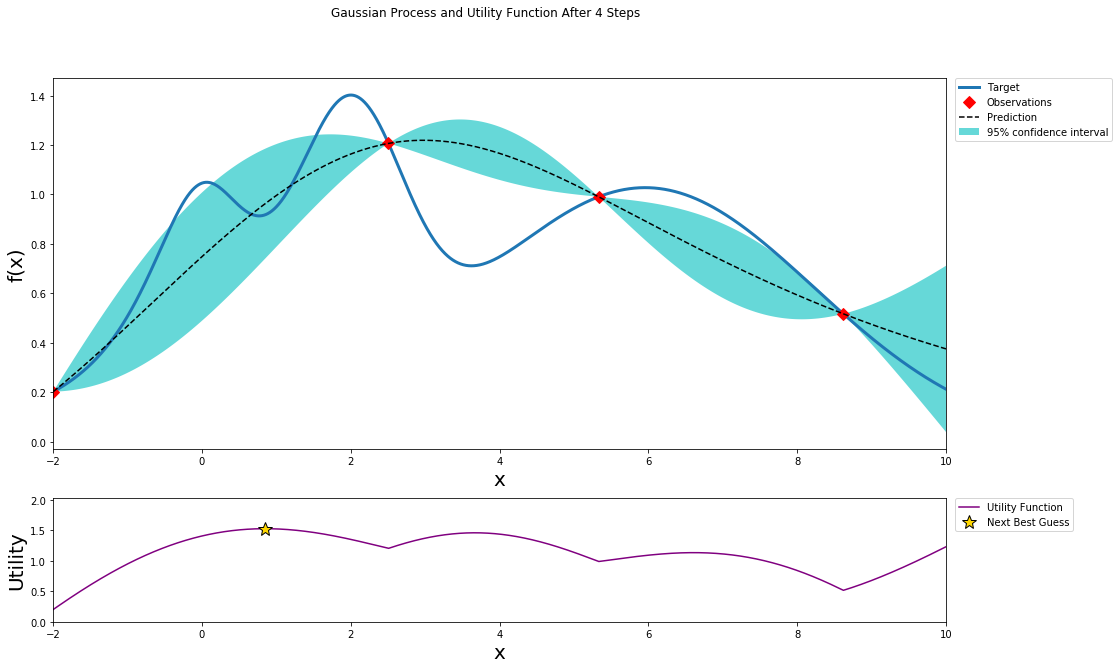

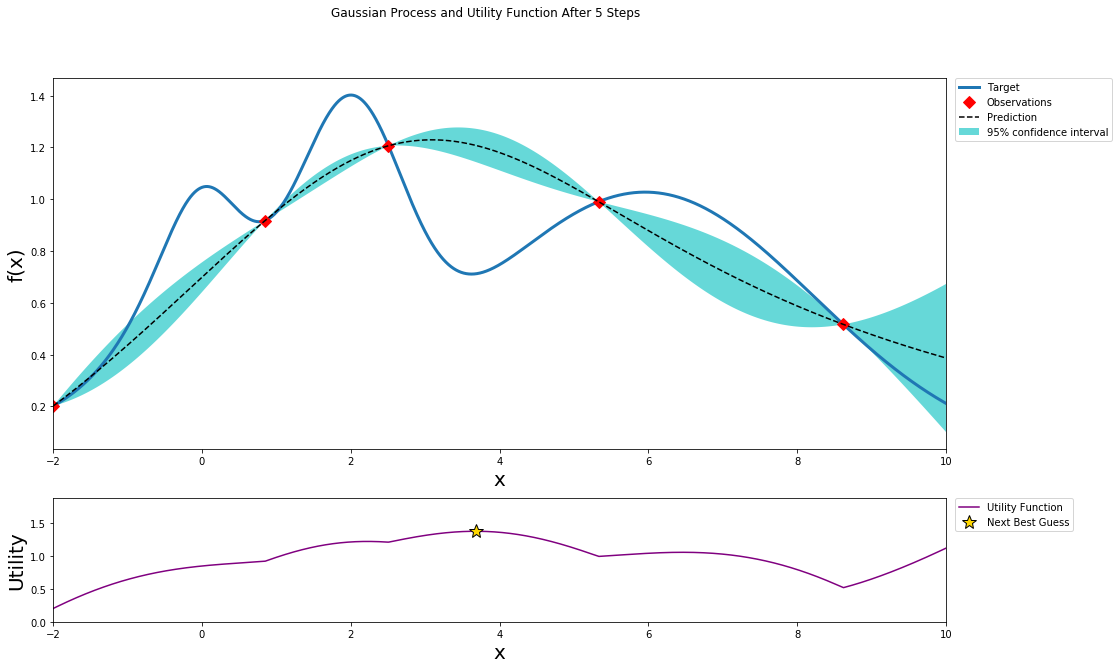

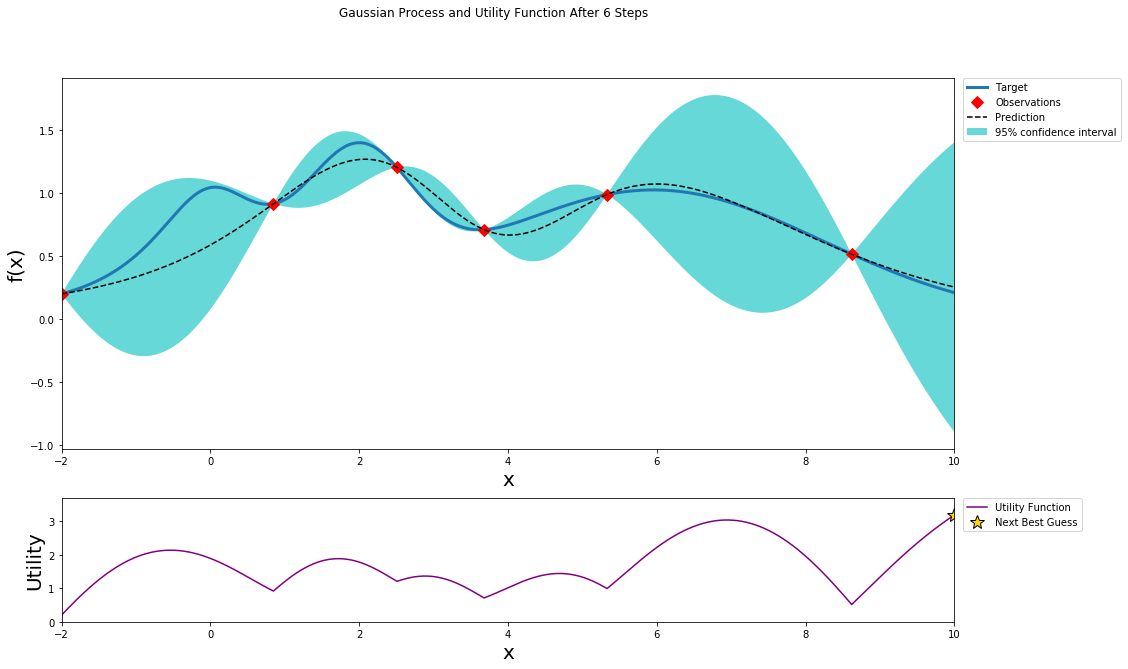

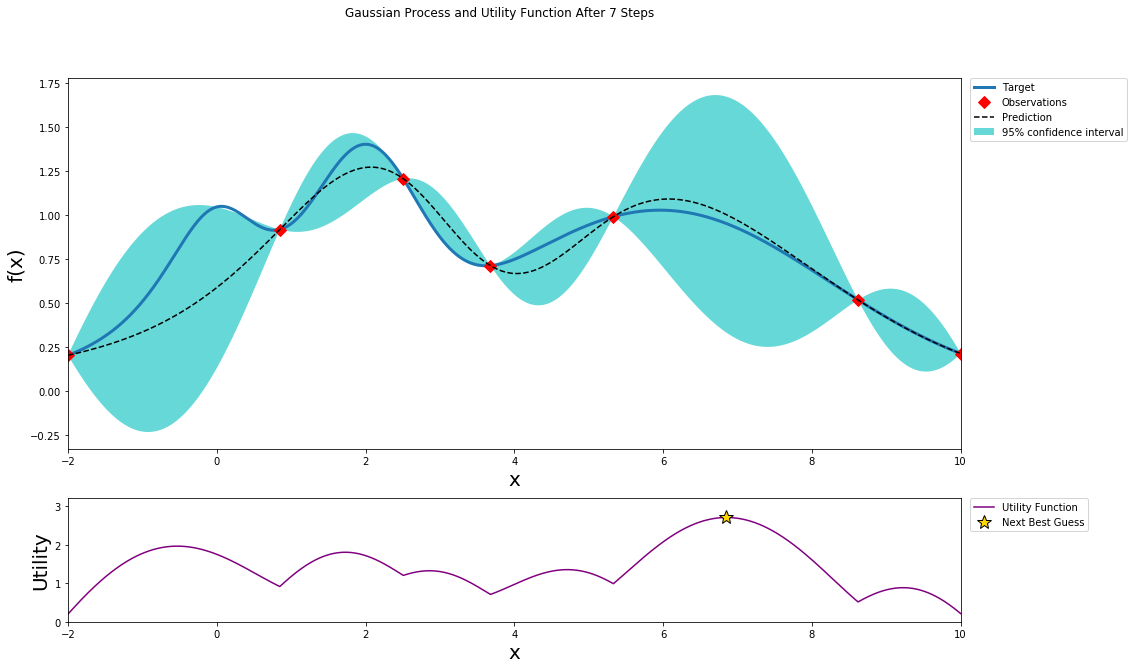

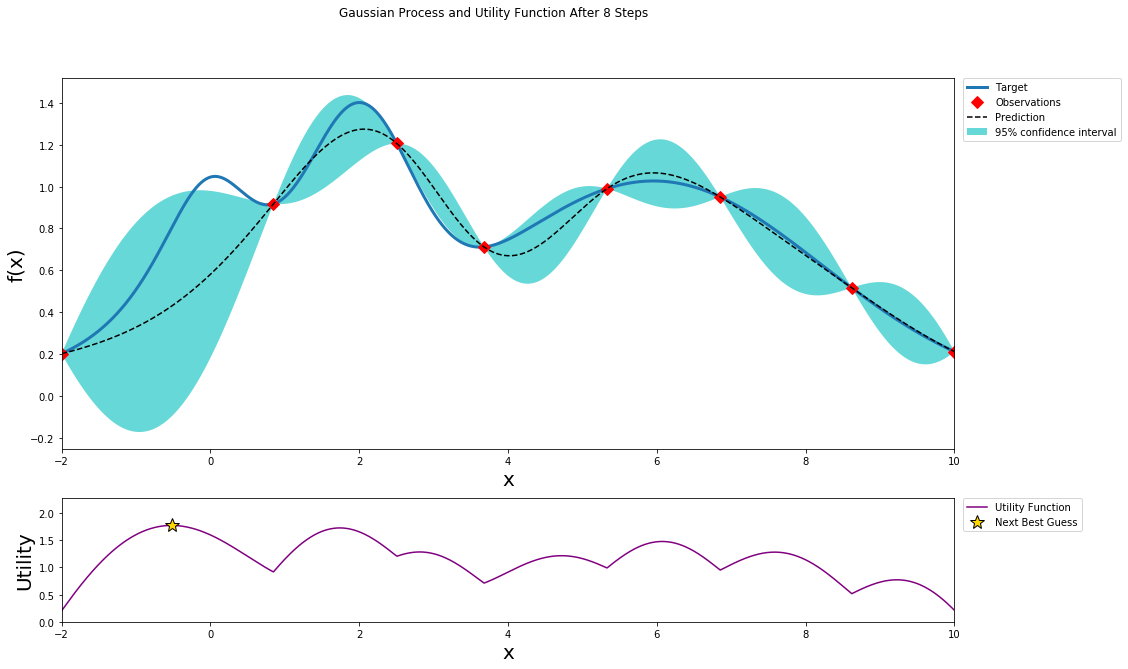

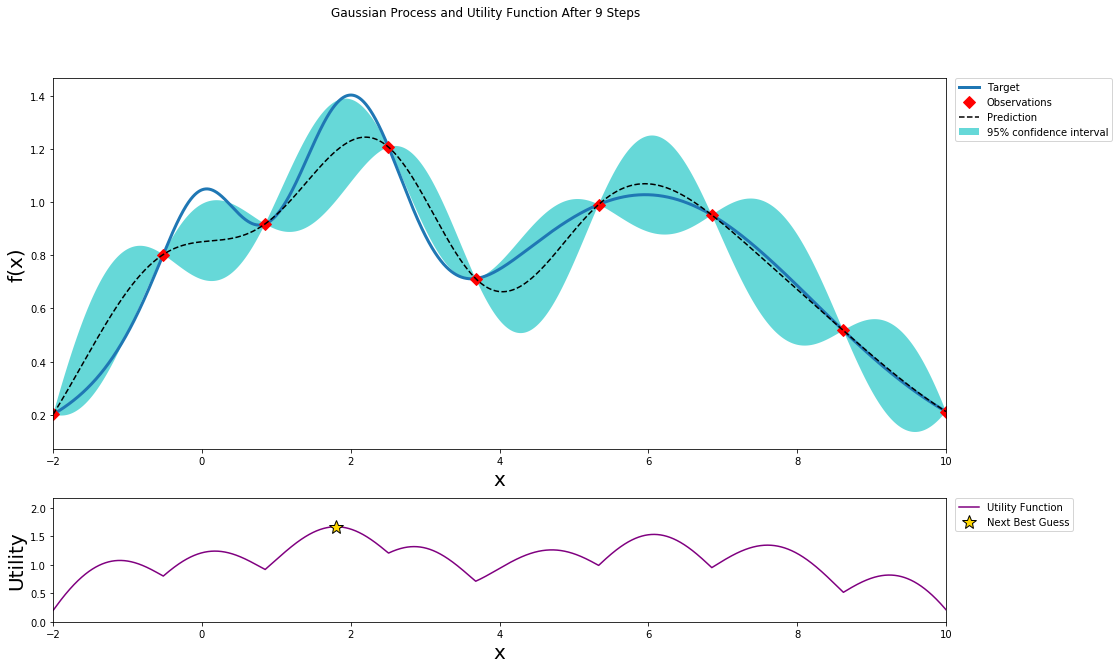

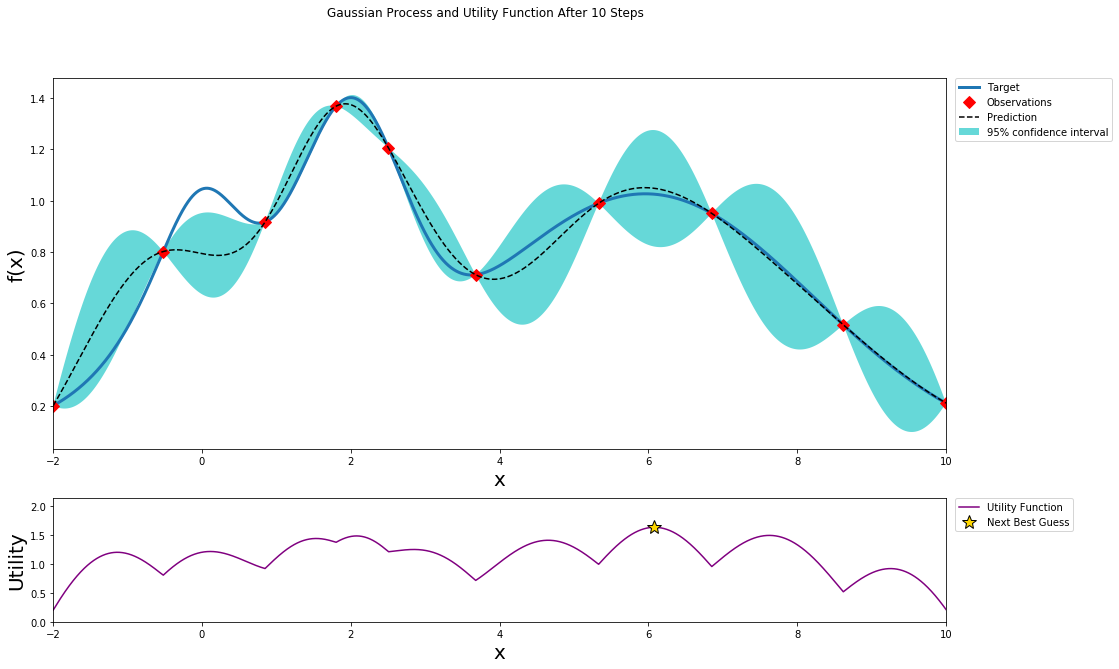

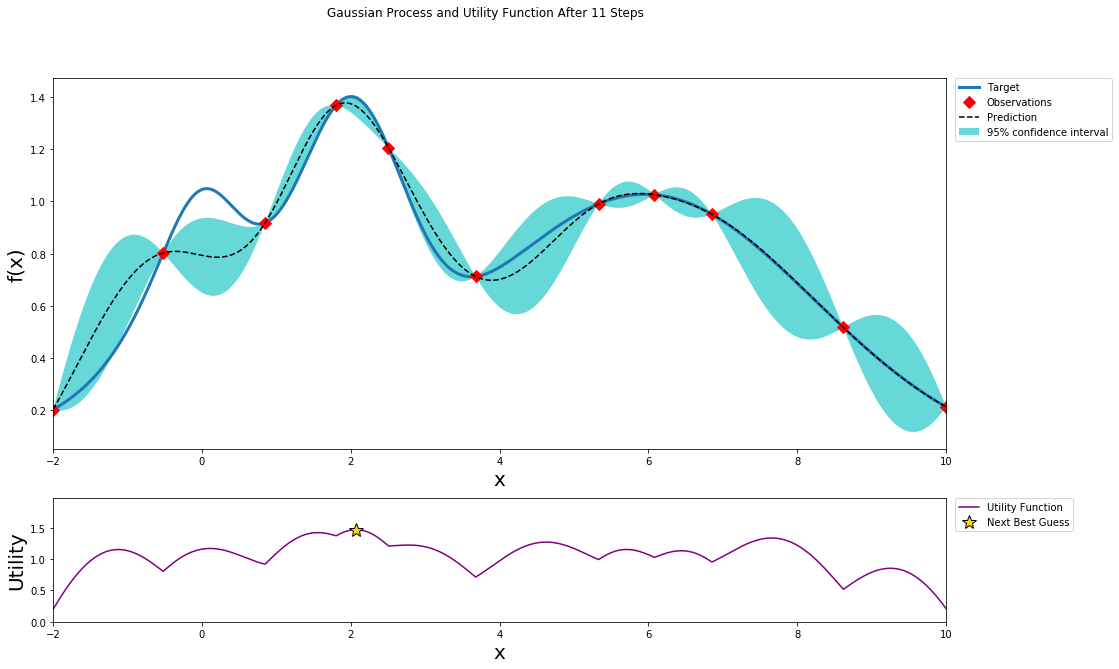

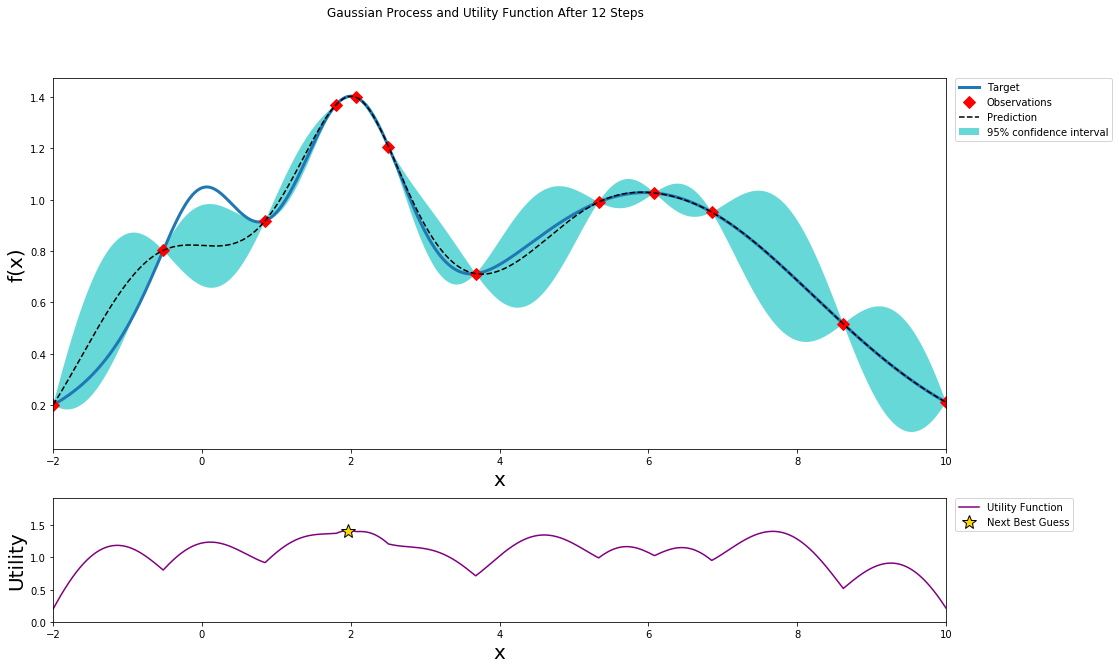

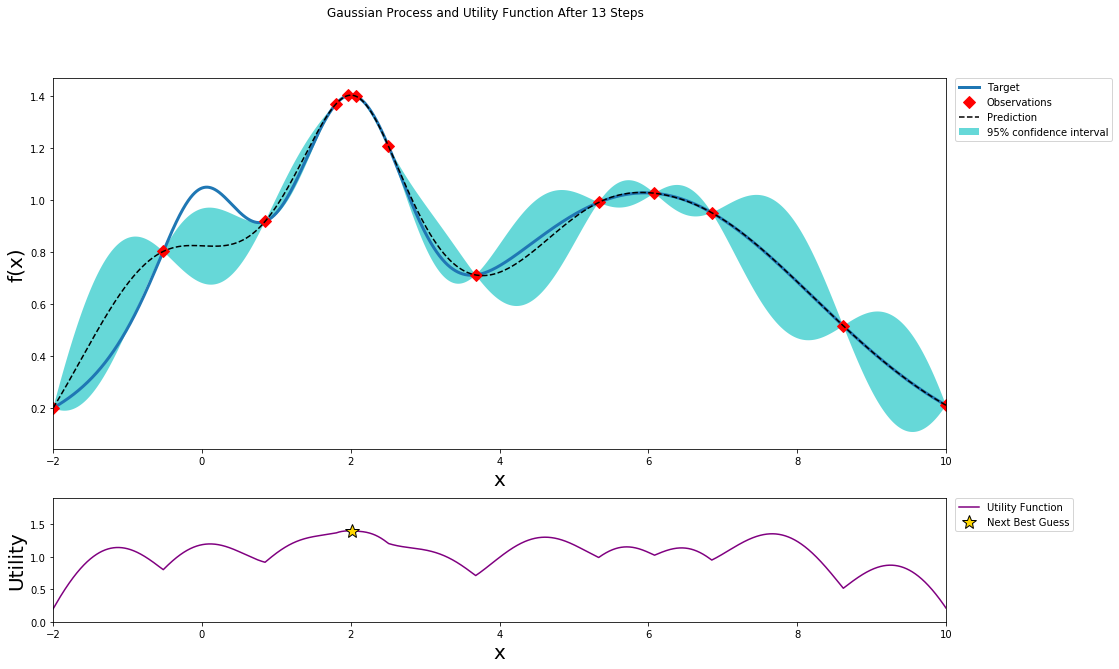

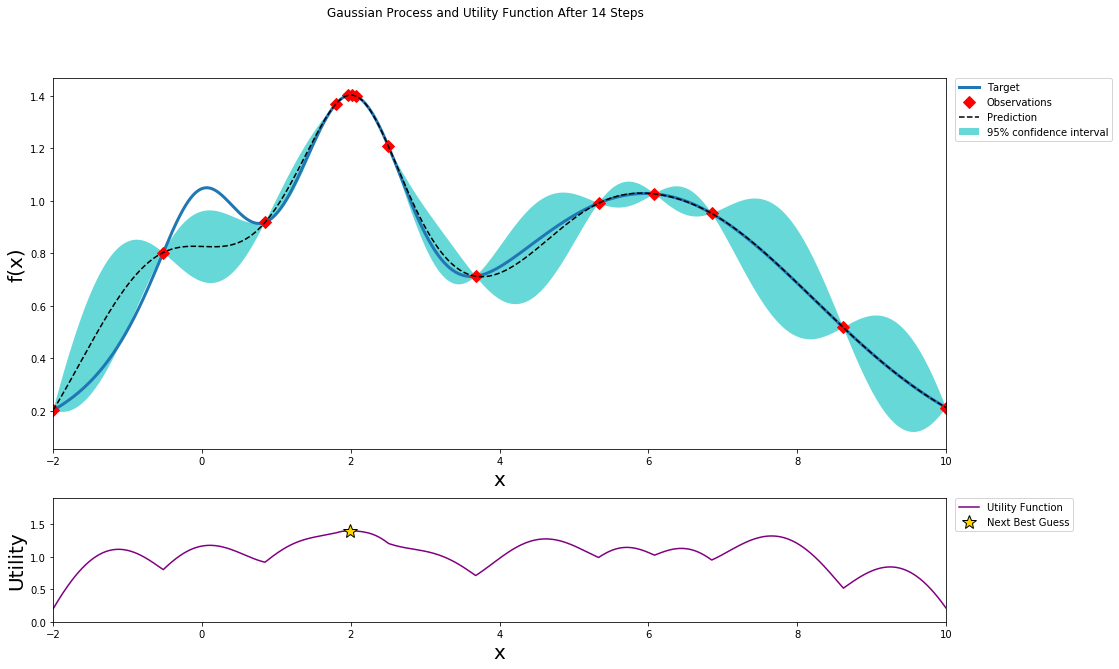

In [100]:
bo = BayesianOptimization(target, {'x': (-2, 10)})
bo.maximize(init_points=2, n_iter=0, kappa=5)
for i in range(12):
    bo.maximize(init_points=0, n_iter=1, kappa=5)
    plot_gp(bo, x, y)

Ok, I think I have a good handle on how this works now, how I'm going to implement it with minimal changes to the main code and how to plot it. I'm going to set up the script now - unfortunately a demonstration is taking place so I won't be able to test with actual data until tomorrow. 